In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



pd.options.display.max_columns = 999  # Allos us to display all columns
pd.options.display.max_rows = 999  # Allos us to display all columns

df_train = pd.read_csv('../datasets/cleaned_train_to_model.csv',keep_default_na=False)
df_test = pd.read_csv('../datasets/cleaned_test_data.csv',keep_default_na=False)

df_train.columns = df_train.columns.str.lower() # column names to lower case
df_test.columns = df_test.columns.str.lower() # column names to lower case

## <span style='background :#3FBFBF' >*******************  Baseline *******************</span>  

In [57]:
df_train['base']=df_train['saleprice'].mean()
bl_MRSE = metrics.mean_squared_error(y_true=df_train['saleprice'], y_pred=df_train['base'] )**.5
print(f'Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')

Mean Root Square Error w/ all cols: 79273.14.


## <span style='background :#3FBFBF' >*******************  Linear Regression *******************</span>  

In [58]:
features = [
 'overall qual',
 'gr liv area',
 'exter qual',
 'kitchen qual',
 'total bsmt sf',
 'garage area',
 '1st flr sf',
 'garage cars',
 'bsmt qual',
 'year built',
 'garage finish',
 'year remod/add',
 'fireplace qu',
 'full bath',
 'foundation_pconc',
 'mas vnr area',
 'totrms abvgrd',
 'fireplaces',
 'heating qc',
 'neighborhood_nridght',
 'bsmtfin sf 1',
 'bsmt exposure',
 'exteriors',
 'mas vnr type_0',
 'exterior 1st',
 'exterior 2nd',
 'garage type_1',
 'sale type_new',
 'garage type_5',
 'foundation_cblock',
 'bsmtfin type 1',
 'open porch sf',
 'lot frontage',
 'wood deck sf',
 'mas vnr type_1',
 'lot area',
 'lot shape',
 'paved drive',
 'garage qual',
 'bsmt full bath',
 'half bath',
 'ms zoning_rm',
 'central air',
 'roof style_hip',
 'garage cond',
 'neighborhood_noridge',
 'garage yr blt',
 'mas vnr type_3',
 'neighborhood_stonebr',
 'pid',
 'roof style_gable',
 '2nd flr sf',
 'electrical',
 'ms zoning_rl',
 'garage type_0',
 'bsmt cond',
 'foundation_brktil',
 'garage type_3',
 'conditions',
 'sale type_wd ',
 'land contour_hls',
 'neighborhood_oldtown',
 'condition 1',
 'house style_2story',
 'house style_1.5fin',
 'bsmt unf sf',
 'neighborhood_names',
 'neighborhood_idotrr',
 'neighborhood_edwards',
 'lot config_culdsac',
 'alley_grvl',
 'fence',
 'neighborhood_somerst',
 'bedroom abvgr',
 'enclosed porch',
 'alley_na',
 'screen porch',
 'neighborhood_brkside',
 'neighborhood_sawyer',
 'condition 2',
 'ms zoning_c (all)',
 'foundation_slab',
 'kitchen abvgr',
 'neighborhood_timber',
 'functional',
 'bldg type_twnhs',
 'neighborhood_meadowv',
 'bldg type_2fmcon',
 'sale type_cod',
 'ms zoning_fv',
 'bldg type_1fam',
 'bldg type_duplex',
 'heating',
 'land contour_bnk',
 'roof matl_wdshngl',
 'overall cond',
 'neighborhood_brdale',
 'land contour_lvl',
 'ms subclass',
 'neighborhood_veenker',
 'lot config_inside',
 'neighborhood_collgcr',
 'neighborhood_swisu',
 'garage type_2',
 'roof matl_compshg',
 'street',
 'house style_1.5unf',
 'house style_sfoyer',
 'bldg type_twnhse',
 'sale type_conld',
 'neighborhood_crawfor',
 'land slope',
 'garage type_4',
# 'ms zoning_a (agr)',
 'neighborhood_clearcr',
 'id',
 'misc feature_0',
 '3ssn porch',
 'misc feature_2',
 'neighborhood_npkvill',
 'roof matl_wdshake',
 'bsmt half bath',
 'house style_2.5fin',
 'house style_slvl',
 'roof style_gambrel',
 'low qual fin sf',
# 'neighborhood_grnhill',
 'mas vnr type_4',
 'exter cond',
 'neighborhood_mitchel',
 'sale type_conlw',
 'neighborhood_nwames',
 'ms zoning_i (all)',
 'ms zoning_rh',
 'pool qc',
 'sale type_con',
 'land contour_low',
 'mo sold',
 'sale type_oth',
 'garage type_6',
 'utilities',
 'pool area',
 'neighborhood_blueste',
 'neighborhood_blmngtn',
 'neighborhood_gilbert',
 'foundation_stone',
 'house style_1story',
 'roof style_mansard',
 'sale type_conli',
 'misc feature_4',
#'misc feature_1',
 'neighborhood_sawyerw',
# 'roof matl_membran',
 'bsmtfin sf 2',
 'yr sold',
 'bsmtfin type 2',
 'lot config_fr2',
 'alley_pave',
 'lot config_fr3',
 'roof style_shed',
# 'neighborhood_landmrk',
 'house style_2.5unf',
 'roof style_flat',
 'misc val',
 'misc feature_3',
 'roof matl_tar&grv',
 'sale type_cwd',
 'lot config_corner',
 'neighborhood_greens',
 'foundation_wood']
#'misc feature_5',
#'roof matl_clytile']


X = df_train[features]
y=df_train['saleprice']



In [59]:
# AFter we get everythign working, create a function to handle this....

# def show_scores(X_mod,y_mod,X_train, X_test, y_train, y_test, model_name):
#     train_r2 = round(model.score(X_train, y_train),4)
#     test_r2 = round(model.score(X_test, y_test),4)
#     cv = round(cross_val_score(model_name, X_train, y_train).mean(),8)
    
#     MRSE = metrics.mean_squared_error(y_true=y_mod, y_pred=model.predict(X_mod))**.5

In [60]:

model = LinearRegression()
model.fit(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42) 

lr_train_r2 = round(model.score(X_train, y_train),4)
lr_test_r2 = round(model.score(X_test, y_test),4)
lr_cv = round(cross_val_score(model, X_train, y_train).mean(),8)


lr_MRSE = metrics.mean_squared_error(y_true=df_train['saleprice'], y_pred=model.predict(df_train[features] ))**.5

print(f'LR training R^2 score: {lr_train_r2}')
print(f'LR test R^2 score: {lr_test_r2}')
print(f'LR CrossVal score: {lr_cv}')
print(f'LR Mean Root Square Error w/ all cols: {round(lr_MRSE,2)}.')
print('********* Base Line *********')
print(f'BL Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')

pred = model.predict(df_test[features])   # make predictions
df_test['saleprice'] = pred               # add predictions to the test data

submission = df_test[['id','saleprice']]
submission.set_index('id', inplace = True)
submission.to_csv('../datasets/submissions/submission26_LinReg.csv')

LR training R^2 score: 0.9295
LR test R^2 score: 0.9193
LR CrossVal score: 0.90411565
LR Mean Root Square Error w/ all cols: 21436.34.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.


In [61]:
# LR training R^2 score: 0.9295
# LR test R^2 score: 0.9193
# LR CrossVal score: 0.90411565
# LR Mean Root Square Error w/ all cols: 21436.34.
# ********* Base Line *********
# BL Mean Root Square Error w/ all cols: 79273.14.

In [62]:
X_test.shape , y_test.shape
#y_test

((512, 165), (512,))

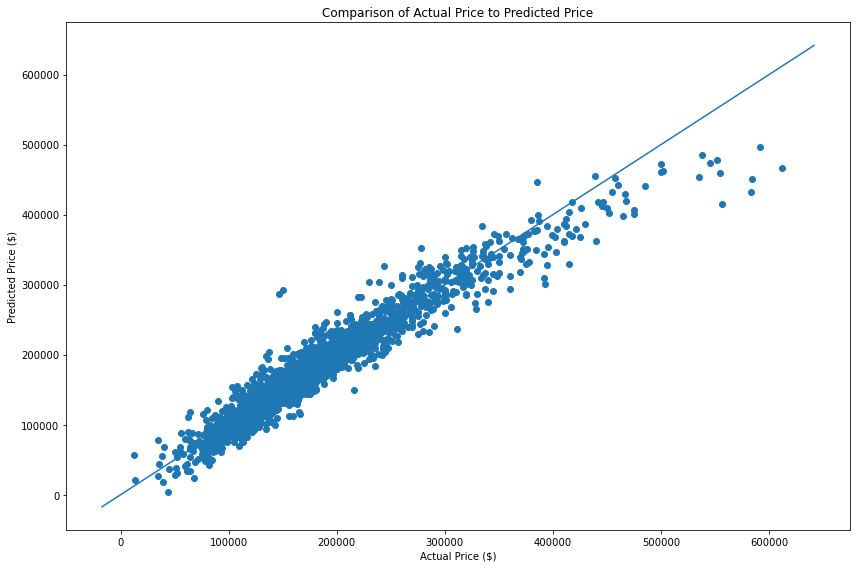

In [63]:
#Credit K Sylvia. Code given during work time
plt.figure(figsize = (12, 8))
plt.scatter(x = df_train['saleprice'], y = model.predict(df_train[features] ) )
plt.title('Comparison of Actual Price to Predicted Price')
xpoints = ypoints = plt.xlim() # code borrowed from kilodalton's response on Stack Overflow
plt.plot(xpoints, ypoints)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.tight_layout();

## <span style='background :#3FBFBF' >*******************  Log Transformation *******************</span>  

In [64]:
# to do the log transformation....

y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

cross_val_score(model, X_train, y_train_log).mean()
model.fit(X_train, y_train_log)

log_train_r2 = round(model.score(X_train, y_train_log),4)
log_test_r2 = round(model.score(X_test, y_test_log),4)
log_cv = round(cross_val_score(model, X_train, y_train_log).mean(),4)
log_MRSE = metrics.mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))**.5

print('********* Log Trans *********')                    
print(f'LOG training R^2 score: {log_train_r2}')
print(f'LOG test R^2 score: {log_test_r2}')
print(f'LOG CrossVal score: {log_cv}')
print(f'LOG Mean Root Square Error w/ all cols: {round(log_MRSE,4)}.')                    
                    
print('********* Linear Reg *********')
print(f'LR training R^2 score: {lr_train_r2}')
print(f'LR test R^2 score: {lr_test_r2}')
print(f'LR CrossVal score: {lr_cv}')
print(f'LR Mean Root Square Error w/ all cols: {round(lr_MRSE,2)}.')
print('********* Base Line *********')
print(f'BL Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')

### PREDICTIONS AFTER LOG

pred_test = model.predict(df_test[features])
df_test['saleprice'] = np.exp(pred_test)
submission = df_test[['id','saleprice']]
submission.set_index('id', inplace = True)
submission.to_csv('../datasets/submissions/submission26_LogT.csv')


********* Log Trans *********
LOG training R^2 score: 0.9411
LOG test R^2 score: 0.8858
LOG CrossVal score: 0.9027
LOG Mean Root Square Error w/ all cols: 197648.7567.
********* Linear Reg *********
LR training R^2 score: 0.9295
LR test R^2 score: 0.9193
LR CrossVal score: 0.90411565
LR Mean Root Square Error w/ all cols: 21436.34.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.


In [65]:
# ********* Log Trans *********
# LOG training R^2 score: 0.9411
# LOG test R^2 score: 0.8858
# LOG CrossVal score: 0.9027
# LOG Mean Root Square Error w/ all cols: 197648.7567.
# ********* Linear Reg *********
# LR training R^2 score: 0.9295
# LR test R^2 score: 0.9193
# LR CrossVal score: 0.90411565
# LR Mean Root Square Error w/ all cols: 21436.34.
# ********* Base Line *********
# BL Mean Root Square Error w/ all cols: 79273.14.

## <span style='background :#3FBFBF' >*******************  Ridge *******************</span>  

In [66]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [67]:
# ridge_model = Ridge(alpha=100)
# ridge_model.fit(Z_train,y_train)
# ridge_cv = ridge_model.fit(Z_train, y_train)

r_alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_cv = ridge_cv.fit(Z_train, y_train)
print(ridge_cv.alpha_)

rdg_train_r2 = round(ridge_cv.score(Z_train, y_train),4)
rdg_test_r2 = round(ridge_cv.score(Z_test, y_test),4)
rdg_cv = round(cross_val_score(ridge_cv, Z_train, y_train).mean(),4)
rdg_MRSE = metrics.mean_squared_error(y_true=y_test, y_pred=ridge_cv.predict(Z_test))**.5


print('********* Ridge *********')
print(f'Ridge training R^2 score: {rdg_train_r2}')
print(f'Ridge test R^2 score: {rdg_test_r2}')
print(f'Ridge CrossVal score: {rdg_cv}')
print(f'Ridge Mean Root Square Error w/ all cols: {round(rdg_MRSE,4)}.')  

print('********* Log Trans *********')                    
print(f'LOG training R^2 score: {log_train_r2}')
print(f'LOG test R^2 score: {log_test_r2}')
print(f'LOG CrossVal score: {log_cv}')
print(f'LOG Mean Root Square Error w/ all cols: {round(log_MRSE,4)}.')                    
                    
print('********* Linear Reg *********')
print(f'LR training R^2 score: {lr_train_r2}')
print(f'LR test R^2 score: {lr_test_r2}')
print(f'LR CrossVal score: {lr_cv}')
print(f'LR Mean Root Square Error w/ all cols: {round(lr_MRSE,2)}.')
print('********* Base Line *********')
print(f'BL Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')

X = ss.transform( df_test[features] )
pred_test = ridge_cv.predict(X)
df_test['saleprice'] = pred_test
submission = df_test[['id','saleprice']]
submission.set_index('id', inplace = True)
submission.to_csv('../datasets/submissions/submission26_ridge.csv')


132.19411484660287
********* Ridge *********
Ridge training R^2 score: 0.9272
Ridge test R^2 score: 0.905
Ridge CrossVal score: 0.9047
Ridge Mean Root Square Error w/ all cols: 24649.3734.
********* Log Trans *********
LOG training R^2 score: 0.9411
LOG test R^2 score: 0.8858
LOG CrossVal score: 0.9027
LOG Mean Root Square Error w/ all cols: 197648.7567.
********* Linear Reg *********
LR training R^2 score: 0.9295
LR test R^2 score: 0.9193
LR CrossVal score: 0.90411565
LR Mean Root Square Error w/ all cols: 21436.34.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.


In [68]:
# 132.19411484660287
# ********* Ridge *********
# Ridge training R^2 score: 0.9272
# Ridge test R^2 score: 0.905
# Ridge CrossVal score: 0.9047
# Ridge Mean Root Square Error w/ all cols: 24649.3734.
# ********* Log Trans *********
# LOG training R^2 score: 0.9411
# LOG test R^2 score: 0.8858
# LOG CrossVal score: 0.9027
# LOG Mean Root Square Error w/ all cols: 197648.7567.
# ********* Linear Reg *********
# LR training R^2 score: 0.9295
# LR test R^2 score: 0.9193
# LR CrossVal score: 0.90411565
# LR Mean Root Square Error w/ all cols: 21436.34.
# ********* Base Line *********
# BL Mean Root Square Error w/ all cols: 79273.14.

## <span style='background :#3FBFBF' >*******************  Lasso *******************</span>  

In [69]:
# ss = StandardScaler()
# Z_train = ss.fit_transform(X_train)
# Z_test = ss.transform(X_test)

# did this above

In [70]:
l_alphas = np.logspace(-3, 0, 100)
lasso_cv = LassoCV(alphas = l_alphas)
lasso_cv.fit(Z_train, y_train);

C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223981613020.9786, tolerance: 795350847.2689885
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138158332555.66254, tolerance: 795350847.2689885
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39479838873.20563, tolerance: 795350847.2689885
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

In [71]:
lasso_cv.alpha_

0.9326033468832199

In [72]:
lasso_cv.score(Z_train,y_train), lasso_cv.score(Z_test,y_test)

(0.9319760400187878, 0.8995222905421991)

In [73]:
lso_train_r2 = round(lasso_cv.score(Z_train,y_train),4)
lso_test_r2 = round(lasso_cv.score(Z_test,y_test),4)
lso_cv = round(cross_val_score(lasso_cv, Z_train,y_train).mean(),8)


#lso_MRSE = metrics.mean_squared_error(y_true=df_train['saleprice'], y_pred=model.predict(df_train[features] ))**.5

C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165108139725.3942, tolerance: 615983112.7097365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75957534776.43692, tolerance: 615983112.7097365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19932739247.48889, tolerance: 615983112.7097365
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\benro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

In [74]:
print('********* Lasso *********')
print(f'Lasso training R^2 score: {lso_train_r2}')
print(f'Lasso test R^2 score: {lso_test_r2}')
print(f'Lasso CrossVal score: {lso_cv}')
#print(f'Lasso Mean Root Square Error w/ all cols: {round(log_MRSE,4)}.')  
                
print('********* Ridge *********')
print(f'Ridge training R^2 score: {rdg_train_r2}')
print(f'Ridge test R^2 score: {rdg_test_r2}')
print(f'Ridge CrossVal score: {rdg_cv}')
print(f'Ridge Mean Root Square Error w/ all cols: {round(rdg_MRSE,4)}.')  

print('********* Log Trans *********')                    
print(f'LOG training R^2 score: {log_train_r2}')
print(f'LOG test R^2 score: {log_test_r2}')
print(f'LOG CrossVal score: {log_cv}')
print(f'LOG Mean Root Square Error w/ all cols: {round(log_MRSE,4)}.')                    
                    
print('********* Linear Reg *********')
print(f'LR training R^2 score: {lr_train_r2}')
print(f'LR test R^2 score: {lr_test_r2}')
print(f'LR CrossVal score: {lr_cv}')
print(f'LR Mean Root Square Error w/ all cols: {round(lr_MRSE,2)}.')
print('********* Base Line *********')
print(f'BL Mean Root Square Error w/ all cols: {round(bl_MRSE,2)}.')


X = ss.transform( df_test[features] )
pred_test = lasso_cv.predict(X)
df_test['saleprice'] = pred_test
submission = df_test[['id','saleprice']]
submission.set_index('id', inplace = True)
submission.to_csv('../datasets/submissions/submission26_lasso.csv')


********* Lasso *********
Lasso training R^2 score: 0.932
Lasso test R^2 score: 0.8995
Lasso CrossVal score: 0.90475563
********* Ridge *********
Ridge training R^2 score: 0.9272
Ridge test R^2 score: 0.905
Ridge CrossVal score: 0.9047
Ridge Mean Root Square Error w/ all cols: 24649.3734.
********* Log Trans *********
LOG training R^2 score: 0.9411
LOG test R^2 score: 0.8858
LOG CrossVal score: 0.9027
LOG Mean Root Square Error w/ all cols: 197648.7567.
********* Linear Reg *********
LR training R^2 score: 0.9295
LR test R^2 score: 0.9193
LR CrossVal score: 0.90411565
LR Mean Root Square Error w/ all cols: 21436.34.
********* Base Line *********
BL Mean Root Square Error w/ all cols: 79273.14.


In [75]:
# ********* Lasso *********
# Lasso training R^2 score: 0.932
# Lasso test R^2 score: 0.8995
# Lasso CrossVal score: 0.90475563
# ********* Ridge *********
# Ridge training R^2 score: 0.9272
# Ridge test R^2 score: 0.905
# Ridge CrossVal score: 0.9047
# Ridge Mean Root Square Error w/ all cols: 24649.3734.
# ********* Log Trans *********
# LOG training R^2 score: 0.9411
# LOG test R^2 score: 0.8858
# LOG CrossVal score: 0.9027
# LOG Mean Root Square Error w/ all cols: 197648.7567.
# ********* Linear Reg *********
# LR training R^2 score: 0.9295
# LR test R^2 score: 0.9193
# LR CrossVal score: 0.90411565
# LR Mean Root Square Error w/ all cols: 21436.34.
# ********* Base Line *********
# BL Mean Root Square Error w/ all cols: 79273.14.